## Lab1 : Potential Function

**Import Dependencies**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from WaveFront import WaveFrontAlgo
from BushFire import BushFireAlgo

**Configuration**

In [2]:
image_path = './data/map0.png'
start = [10,10]
goal = [90,70]

WF = WaveFrontAlgo()
wf_algo = [[WF.wavefront_planner_connect_4,WF.find_the_path_8],
           [WF.wavefront_planner_connect_8,WF.find_the_path_8],
           [WF.wavefront_planner_euclidean,WF.find_the_path_8]]
selected_wf_algo = wf_algo[2]

BF = BushFireAlgo()
q = 4
bf_algo = [[BF.bushfire_connect_4,BF.repulsive_function],
           [BF.bushfire_connect_8,BF.repulsive_function],
           [BF.bushfire_euclidean,BF.repulsive_function]]
selected_bf_algo = bf_algo[1]

**Prepare Grid Map Data** 

* Load grid map from image file

In [3]:
image = Image.open(image_path).convert('L')
grid_map = np.array(image.getdata()).reshape(image.size[0],image.size[1])/255

* Binarize the image into proper format

In [4]:
grid_map[grid_map > 0.5] = 1
grid_map[grid_map <= 0.5] = 0
# Invert colors to make 0 -> free and 1 -> occupied
grid_map = (grid_map * -1) + 1

grid_map


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

* Show grid map 


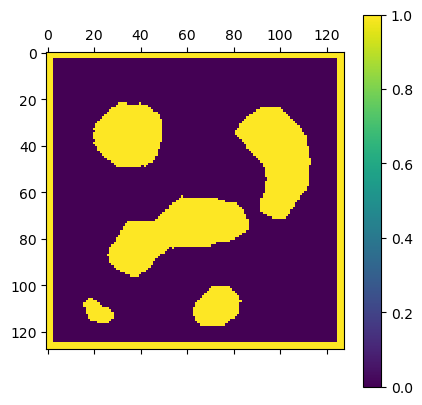

In [5]:
plt.matshow(grid_map)
plt.colorbar()
plt.show()

* Show grid map with objective

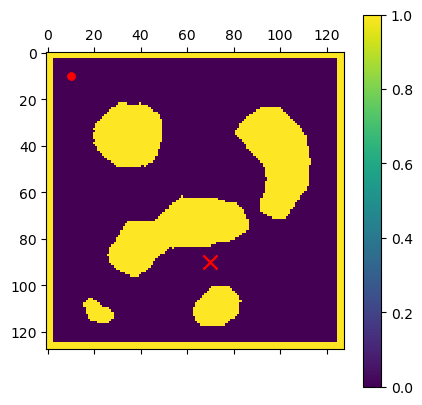

In [6]:
a = plt.matshow(grid_map)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')
a.axes.add_artist(Drawing_start_point)
a.axes.add_artist(Drawing_goal_point)
plt.colorbar()
plt.show()

**WaveFront**

* find the attractive function

In [7]:
result = selected_wf_algo[0](grid_map.copy(),goal)
result


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

* normalize the data for visualization

In [8]:
result_normalized = result.copy()

max = result_normalized.max() 
min = 2

result_normalized[result_normalized == 1]= max + 1
max = result_normalized.max() 
result_normalized= (result_normalized- min)/ (max)
        


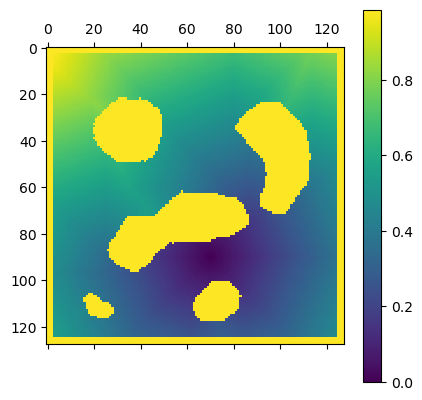

In [9]:
plt.matshow(result_normalized)
plt.colorbar()
plt.show()

* Find the path

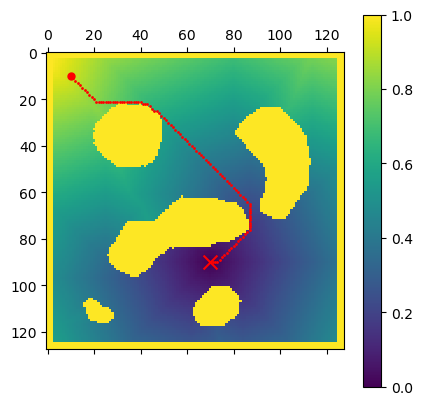

Path Distance: 133.58073580374344
106


In [10]:
path = selected_wf_algo[1](result_normalized,start)    
plt.matshow(result_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')


plt.colorbar()
plt.show()

total_distance = 0
for i in range(len(path)-1):
    distance = ((path[i][0] - path[i+1][0])**2 + (path[i][1] - path[i+1][1])**2 )**0.5
    total_distance = total_distance + distance

print("Path Distance: {}".format(total_distance))
print(len(path))

In [11]:
# loc_min = WF.find_lcoal_minimum(result)
# print(loc_min)


## BushFire

* Generate repulsive fuction from obstacle 

In [12]:
bushfire_fx = selected_bf_algo[0](grid_map.copy())
repulsive_fx = selected_bf_algo[1](bushfire_fx.copy(),q)


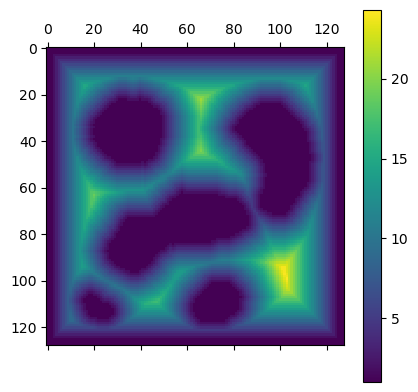

In [13]:
plt.matshow(bushfire_fx)
plt.colorbar()
plt.show()

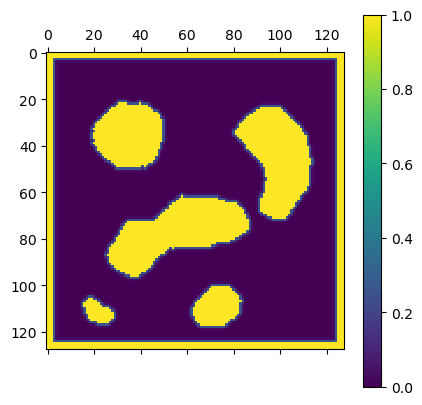

In [14]:
plt.matshow(repulsive_fx)
plt.colorbar()
plt.show()

## WaveFront + BushFire

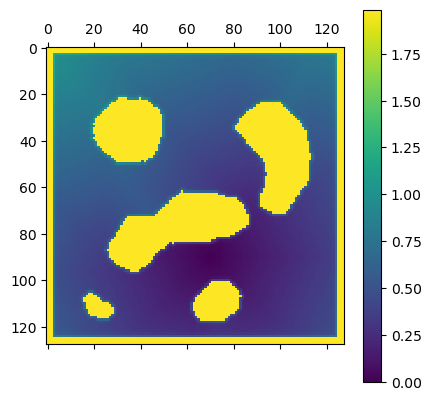

In [15]:
combined_map = result_normalized + repulsive_fx
combined_map_normalized = combined_map.copy()
max = combined_map_normalized.max() 
min = combined_map_normalized.min()
combined_map_normalized = (combined_map_normalized - min)/ (max)
        
plt.matshow(combined_map)
plt.colorbar()
plt.show()

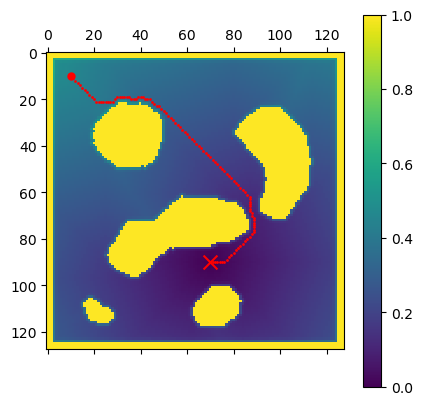

Path Distance: 141.23759005323586
112


In [16]:
path = selected_wf_algo[1](combined_map_normalized,start)    
plt.matshow(combined_map_normalized)
Drawing_start_point= plt.scatter(start[1], start[0], s=100, c='red', marker='.')
Drawing_goal_point = plt.scatter(goal[1], goal[0], s=100, c='red', marker='x')

path_np = np.array(path)
x,y = path_np.T
Drawing_path = plt.scatter(y,x,s=1.0,c='red')

# loc_min = WF.find_lcoal_minimum(combined_map)
# print(loc_min)
# local_np = np.array(loc_min)
# x,y = local_np.T
# Drawing_path = plt.scatter(y,x,s=10.0,c='black',marker='x')

plt.colorbar()
plt.show()

total_distance = 0
for i in range(len(path)-1):
    distance = ((path[i][0] - path[i+1][0])**2 + (path[i][1] - path[i+1][1])**2 )**0.5
    total_distance = total_distance + distance

print("Path Distance: {}".format(total_distance))
print(len(path))

